In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
df = df.resample('H').sum().truncate('2019-03-31','2019-11-17')

df

,Ativa
Data,
2019-03-31 00:00:00,558.72
2019-03-31 01:00:00,559.44
2019-03-31 02:00:00,556.56
2019-03-31 03:00:00,563.76
2019-03-31 04:00:00,563.76
...,...
2019-11-16 20:00:00,614.88
2019-11-16 21:00:00,615.60
2019-11-16 22:00:00,609.12


In [11]:
time_steps = 168
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.Ativa, time_steps)
X_test, y_test = create_dataset(test, test.Ativa, time_steps)
print(X_train.shape, y_train.shape)

(4268, 168, 1) (4268,)


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [14]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

4436 1109


In [15]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

In [8]:
y_pred = model.predict(X_test)

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize= (25,9))
plt.plot(y_pred)

ValueError: x and y can be no greater than 2-D, but have shapes (941,) and (941, 168, 1)

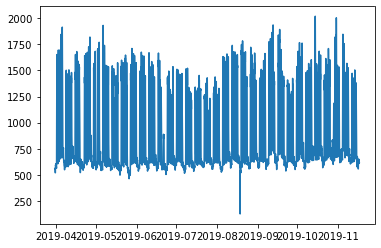

In [10]:
plt.plot(df)